# PaA from HII regions

https://github.com/keflavich/hst_w51_2019/blob/9c0999b55cd008e3ac0aa3f608627c202e19c6f7/radio_to_pab.py
    
    see also pyspeckit's hydrogen module

In [1]:
%matplotlib inline
import pylab as pl
from astropy import units as u, constants

In [2]:
from pyspeckit.spectrum.models import hydrogen

In [3]:
# from table in Draine
alpha_b_5e3 = 4.53e-13*u.cm**3*u.s**-1
alpha_b_1e4 = 2.59e-13*u.cm**3*u.s**-1
alpha_b_2e4 = 1.43e-13*u.cm**3*u.s**-1


def dens(Qlyc=1e45*u.s**-1, R=0.1*u.pc, alpha_b=alpha_b_1e4):
    return (((3 * Qlyc)/(4 * np.pi * R**3 * alpha_b))**0.5).to(u.cm**-3)

def EM(Qlyc=1e45*u.s**-1, R=0.1*u.pc, alpha_b=alpha_b_1e4):
    return (R * (((3 * Qlyc)/(4 * np.pi * R**3 * alpha_b))**0.5)**2).to(u.cm**-6*u.pc)

def alpha_eff(T, line='beta'):
    """ H-alpha recombination coefficient.  eqn 14.8, 14.9 in draine 2001"""
    T4 = (T/(1e4*u.K)).decompose().value
    if line == 'alpha':
        return 1.17e-13 * T4**(-0.942-0.031*np.log(T4)) * u.cm**3*u.s**-1
    elif line == 'beta':
        return 3.03e-14 * T4**(-0.874-0.058*np.log(T4)) * u.cm**3*u.s**-1

hb_to_paa = 0.336
alpha_paa = alpha_eff(1e4, line='beta') * hb_to_paa

In [4]:
paa_to_cont = alpha_paa / alpha_b_1e4
paa_to_cont

<Quantity 0.03930811>

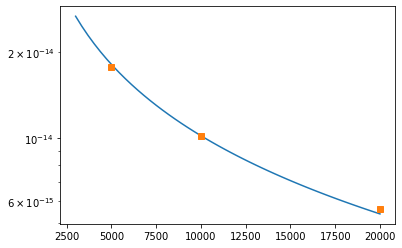

In [5]:
tems = np.linspace(3000,20000)
pl.semilogy(tems, alpha_eff(tems)*hb_to_paa)
pl.plot([5000,1e4,2e4], u.Quantity([alpha_b_5e3, alpha_b_1e4, alpha_b_2e4]) * paa_to_cont, 's')

In [6]:
qlycs = np.logspace(40,52)*u.s**-1
radii = np.logspace(0.1,2,10)*u.pc
alpha_paa = alpha_eff(1e4*u.K, 'beta')*hb_to_paa

Text(0.5, 0, '$Q_{lyc}$')

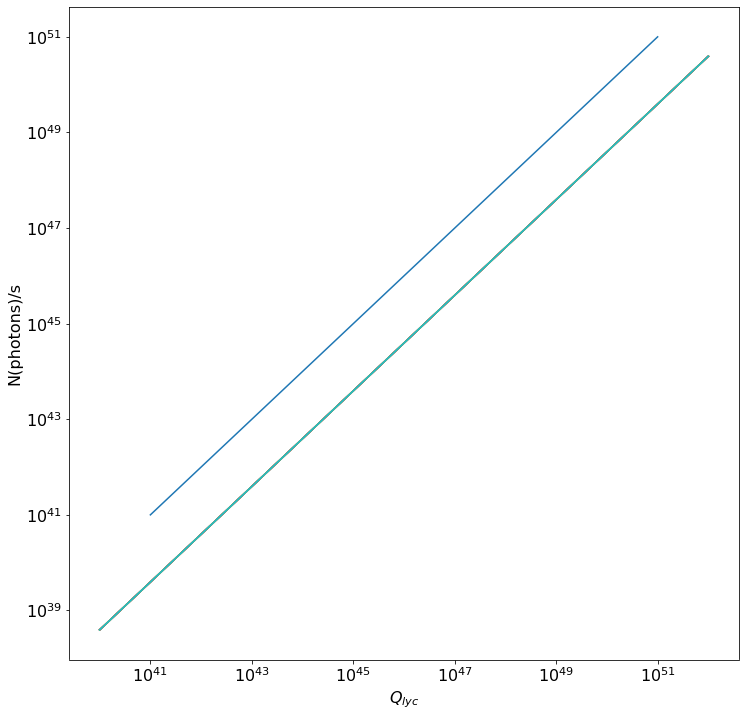

In [7]:
pl.figure(figsize=(12,12))
pl.rcParams['font.size'] = 16
for radius in radii:
    n_atoms = dens(Qlyc=qlycs, R=radius) * 4/3*np.pi*radius**3
    pl.loglog(qlycs, (dens(Qlyc=qlycs, R=radius)*alpha_paa*n_atoms).to(u.s**-1), label=radius)
pl.loglog([1e41,1e51],[1e41,1e51])
pl.ylabel("N(photons)/s")
pl.xlabel("$Q_{lyc}$")

In [8]:
n_atoms

<Quantity [7.41939691e+01, 9.83597881e+01, 1.30396689e+02, 1.72868373e+02,
           2.29173566e+02, 3.03818002e+02, 4.02774978e+02, 5.33963366e+02,
           7.07881303e+02, 9.38446289e+02, 1.24410891e+03, 1.64932932e+03,
           2.18653463e+03, 2.89871381e+03, 3.84285784e+03, 5.09452032e+03,
           6.75386349e+03, 8.95367359e+03, 1.18699868e+04, 1.57361765e+04,
           2.08616280e+04, 2.76564973e+04, 3.66645328e+04, 4.86065879e+04,
           6.44383060e+04, 8.54265947e+04, 1.13251007e+05, 1.50138148e+05,
           1.99039849e+05, 2.63869390e+05, 3.49814649e+05, 4.63753256e+05,
           6.14802963e+05, 8.15051275e+05, 1.08052274e+06, 1.43246128e+06,
           1.89903019e+06, 2.51756591e+06, 3.33756574e+06, 4.42464884e+06,
           5.86580726e+06, 7.77636735e+06, 1.03092186e+07, 1.36670482e+07,
           1.81185612e+07, 2.40199825e+07, 3.18435638e+07, 4.22153744e+07,
           5.59654017e+07, 7.41939691e+07] pc3 / cm3>

Text(0.5, 0, '$Q_{lyc}$')

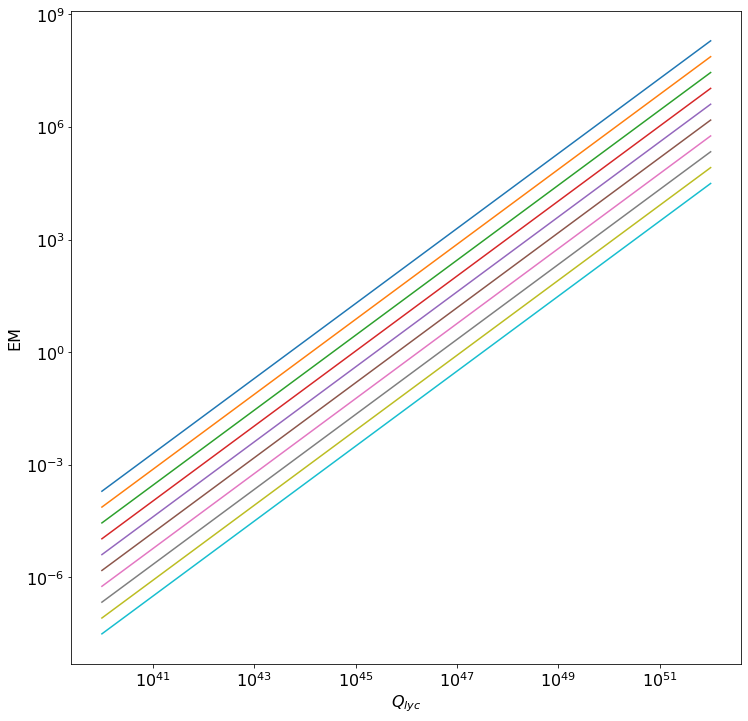

In [9]:
pl.figure(figsize=(12,12))
pl.rcParams['font.size'] = 16
for radius in radii:
    pl.loglog(qlycs, (EM(Qlyc=qlycs, R=radius)).to(u.cm**-6*u.pc), label=radius)
pl.ylabel("EM")
pl.xlabel("$Q_{lyc}$")

Text(0.5, 0, '$Q_{lyc}$')

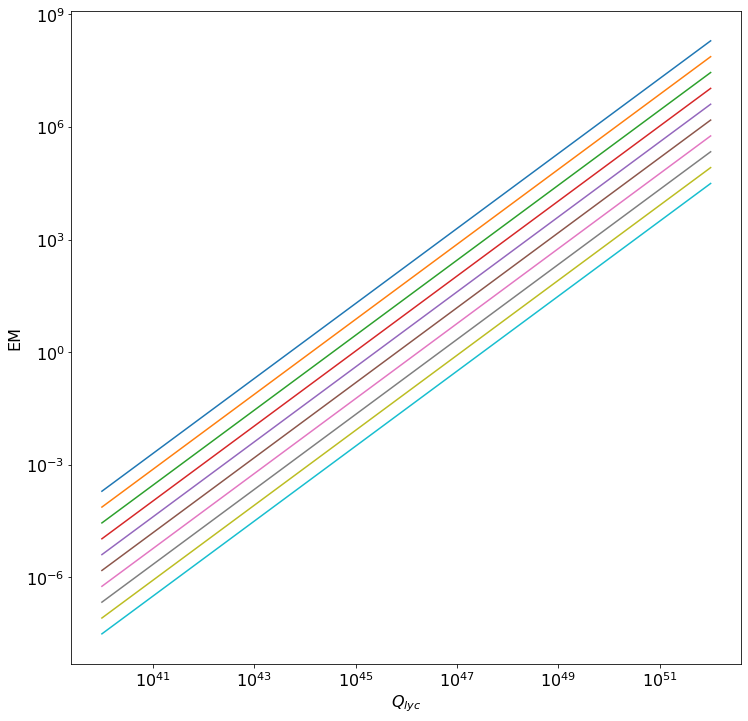

In [10]:
pl.figure(figsize=(12,12))
pl.rcParams['font.size'] = 16
for radius in radii:
    pl.loglog(qlycs, (EM(Qlyc=qlycs, R=radius)).to(u.cm**-6*u.pc), label=radius)
pl.ylabel("EM")
pl.xlabel("$Q_{lyc}$")

## unresolved source

In [11]:
sb_sensitivity = 1.5e-16 *u.erg/u.s/u.cm**2/u.arcsec**2
aperture = 24*u.cm
wl_paa = hydrogen.wavelength['paschena']*u.um
fwhm = (1.22*wl_paa / aperture).to(u.arcsec, u.dimensionless_angles())
psf_area = 2*np.pi*(fwhm**2) / (8*np.log(2))
ps_sensitivity = sb_sensitivity * psf_area
sb_sensitivity, ps_sensitivity, psf_area

(<Quantity 1.5e-16 erg / (arcsec2 cm2 s)>,
 <Quantity 6.57330179e-16 erg / (cm2 s)>,
 <Quantity 4.38220119 arcsec2>)

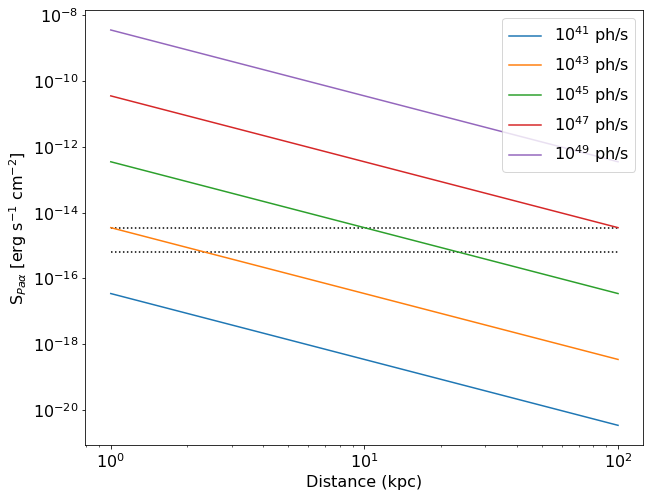

In [12]:
pl.figure(figsize=(10,8))
e_paa = (wl_paa).to(u.eV, u.spectral())
qlycs = [1e41, 1e43, 1e45, 1e47, 1e49]*u.s**-1
paas = paa_to_cont * qlycs * e_paa
distances = np.logspace(0, 2)*u.kpc
for paa,ql in zip(paas, qlycs):
    pl.loglog(distances, (paa/distances**2).to(u.erg/u.s/u.cm**2) / (4*np.pi), label=f"$10^{{{int(np.log10(ql.value))}}}$ ph/s")
pl.hlines(u.Quantity([ps_sensitivity, ps_sensitivity*5]), 1, 100, color='k', linestyle=':')
pl.ylabel("S$_{Pa\\alpha}$ [erg s$^{-1}$ cm$^{-2}$]")
pl.xlabel("Distance (kpc)")
pl.legend(loc='best')

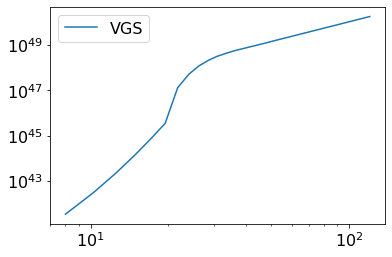

In [13]:
import imf
masses = np.linspace(8,120)
pl.loglog(masses, 10**imf.lyc_of_star(masses, grid='VGS'), label='VGS')
#pl.loglog(masses, imf.lyc_of_star(masses, grid='Ekstrom'), label='Ekstrom')
pl.legend(loc='best')